# MOVIE RECOMMENDATION SYSTEM
---
**TEAM_MM2_JHB**

# Contents
---
1. Introduction
- Problem Statement 
- Data description 
2. Imports
- Import libraries and packages
- Import data
3. Data viewing
4. Data Preprocessing
- Missing or null values
- Treament of null values
- Normalising and combining the data
5. Exploratory Data Analysis
- Most common genre
- Ratings per user
- Distribution of ratings 
- Movie runtime statistics
- Most appearing director
- Total movies released per year
- Top 20 popular actors
- Popular words used in movie titles
- Repeating movie names
- Most popular tags

6. Modelling
- Feature engeneering
- Building the recommender system 
- Content based filtering
- Collaborative filtering
- Baseline Only Model
- SVD model
- NMF model 
- Hyperparameter tuning
- Predictions
- Model saving
- Conclusion 

# 1. INTRODUCTION
---
Recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis.Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item.

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user. They are used to predict the rating or preference that a user would give to an item. Amazon uses it to suggest products to customers, Facebook uses it to recommend pages to like and people to follow. Moreover YouTube, Netflix, Spotify use it to decide which video to play next on autoplay.

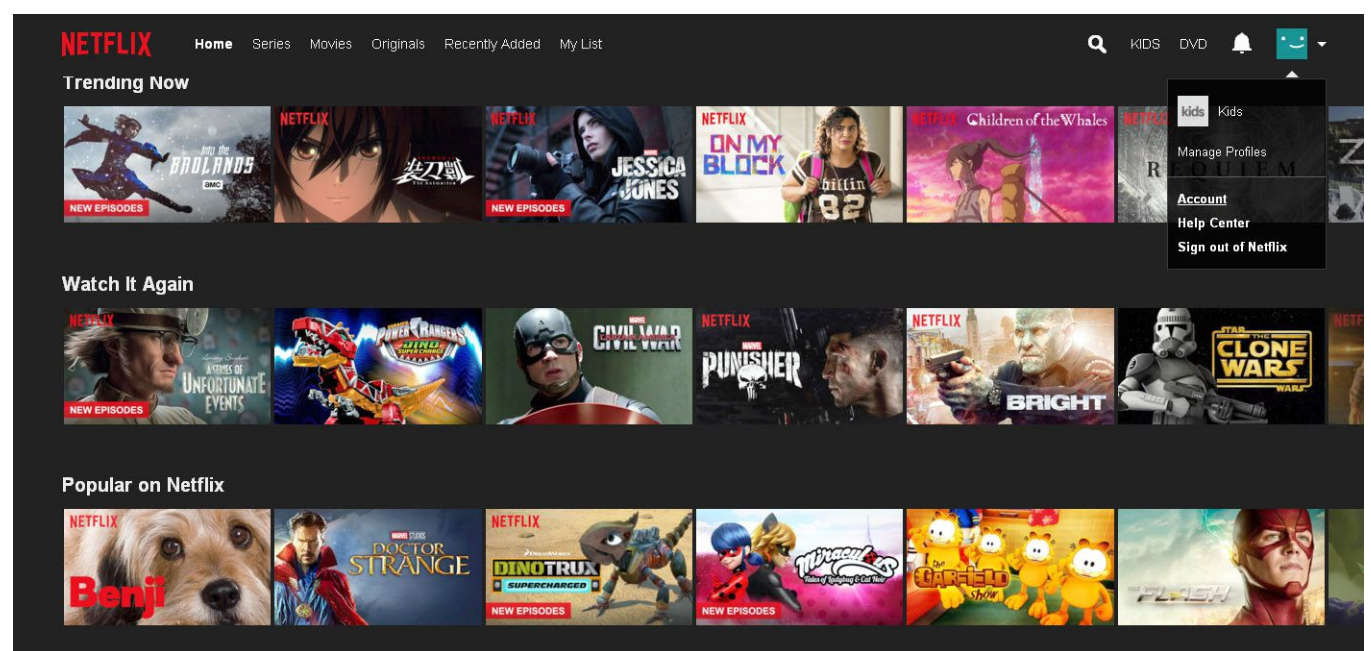

## Problem Statement
---
Construct a recommendation algorithm based on content or collaborative filtering capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences

## Dataset Description
---
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data and resampled for fair evaluation purposes.

### Supplied Files
- genome_scores.csv - A score mapping the strength between movies and tag-related properties.
- genome_tags.csv - User assigned tags for genome-related scores.
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### Additional Information
The below information is provided directly from the MovieLens dataset description files:


### Ratings Data File Structure (train.csv)
All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
- userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within the user, by movieId.
Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


### Tags Data File Structure (tags.csv)
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:
- userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within the user, by movieId.
Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag are determined by each user.
Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970


### Movies Data File Structure (movies.csv)
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:
- movieId,title,genres

Movie titles are entered manually or imported from https://www.themoviedb.org/ and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.
Genres are a pipe-separated list, and are selected from the following:
Action Adventure Animation Children's Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western (no genres listed)


### Links Data File Structure (links.csv)
Identifiers that can be used to link to other sources of movie data ae contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:
- movieId,imdbId,tmdbId

movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.
imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.
tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.


### Tag Genome (genome-scores.csv and genome-tags.csv)
As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.
The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:
- movieId,tagId,relevance

The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:
- tagId,tag

# 2. IMPORTS
---

We will being by importing the libraries and packages that we are going to use to process, visualise and create our models. The data that we will use will be imported from a CSV file into dataframes.
### Import libraries and packages 

In [2]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS
import time



# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from sklearn.cluster import KMeans
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD, BaselineOnly, CoClustering, NMF
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

### Import data

In [3]:
sample_submission = pd.read_csv('sample_submission.csv')
movies = pd.read_csv('movies.csv')
imdb = pd.read_csv('imdb_data.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# 3. DATA VIEWING
---

Following the necessary imports is for viewing the data to see what information we can get from it.

In [4]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
imdb.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [6]:
genome_scores.head()

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

In [7]:
genome_tags.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [8]:
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [9]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [10]:
train.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [11]:
test.head()

userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

In [12]:
sample_submission.head()

Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0
3  1_6711     1.0
4  1_7318     1.0

In [13]:
dataset=pd.merge(train,movies,on='movieId')

In [14]:
dataset.head()

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1  Comedy|Crime|Drama|Thriller  
2  Comedy|Crime|Drama|Thriller  
3  Comedy|Crime|Drama|Thriller  
4  Comedy|Crime|Drama|Thriller

In [15]:
import datetime
from datetime import datetime,date
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [16]:
dataset['datetime'].sample(3)

5388524   1970-01-01 00:00:00.944983028
4305046   1970-01-01 00:00:00.942311307
3976262   1970-01-01 00:00:01.137685149
Name: datetime, dtype: datetime64[ns]

In [17]:
dataset1=pd.merge(imdb,movies,on='movieId')

In [18]:
dataset1.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  \
0                   toy|rivalry|cowboy|cgi animation   
1                   board game|adventurer|fight|game   
2                         boat|lake|neighbor|rivalry   
3  black american|husband wife relationship|betra...   
4                    fatherhood|doberman|dog|mansion   

                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

# 4. DATA PREPROCESSING
---

Firstly, we check if our data has any null values, missing values and blank spaces.

In [19]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [20]:
test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [21]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [22]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [23]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [24]:
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [25]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [26]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [27]:
blanks = []  

for ms in movies.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [28]:
blanks = []  

for ms in imdb.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [29]:
blanks = []  

for ms in genome_scores.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [30]:
blanks = []  

for ms in tags.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [31]:
blanks = []  

for ms in links.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


All the dataframes have been checked at we have a few null values in some data frames which are as follows.
On the imdb dataframe:
- title_cast       10068
- director          9874
- runtime          12089
- budget           19372
- plot_keywords    11078

On the tags dataframe:
- tag          16

On the links dataframe:
- tmdbId     107

There are no blank entries on any dataframe. 

### Treating null values
A large number of null values are present in the data we have, however, because the affected dataframes will not be used when creating the models. These null values will be left as they are so as not to distort the dataset. 

# 5. EXPLORATORY DATA ANALYSIS
---

Now let us begin the process of exploring our data. This process will be referred to as Exploratory Data Analysis or EDA. The reason we explore the data is to gain insight on the data and how it behaves. Exploratory data analysis (EDA) is a term for certain kinds of initial analysis and findings done with data sets, usually early on in an analytical process. Some experts describe it as “taking a peek” at the data to understand more about what it represents and how to apply it.

### Most common genres

In [32]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

movieId     genres
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

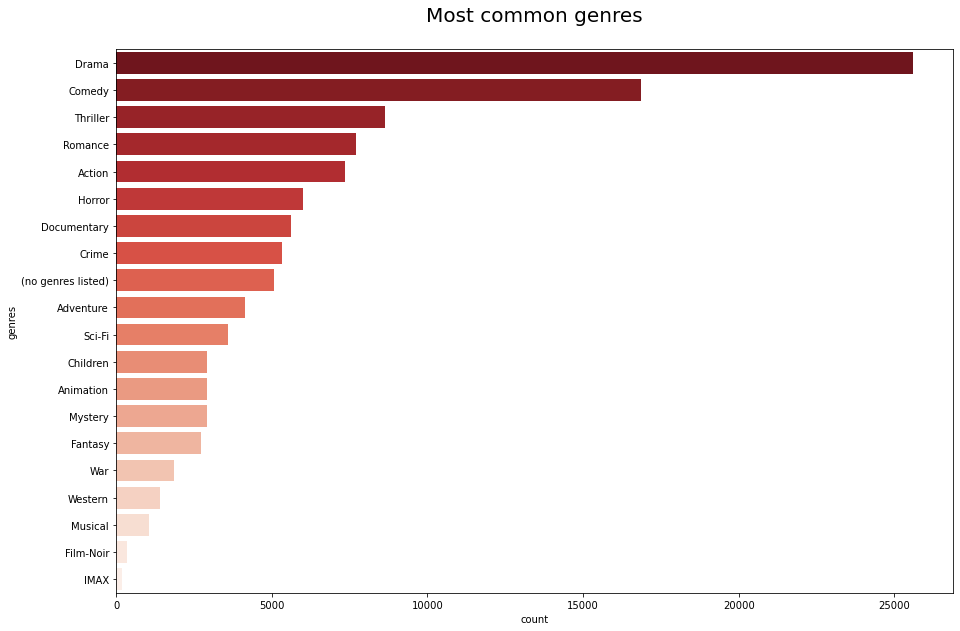

In [33]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

##### Observation:
The graph above shows that the most common genres are drama, comedy, thriller, etc. People love drama movies more than any other genre therefore more of those should always form part of a user's recommendation. Children and animation genres are equally common and this could be attributed to the fact that most children's movies are animated.Imax is the least common genres.

### Ratings per user

In [34]:
train1 = train.copy()
train1.drop('timestamp', axis = 1, inplace = True)

In [35]:
ratings_per_user = train1.groupby('userId')['rating'].count().reset_index().sort_values('rating', ascending=False)
ratings_per_user

userId  rating
72314    72315   12952
80973    80974    3680
137292  137293    3588
33843    33844    3208
20054    20055    3050
...        ...     ...
79086    79087       1
53639    53640       1
105713  105714       1
121070  121071       1
55361    55362       1

[162541 rows x 2 columns]

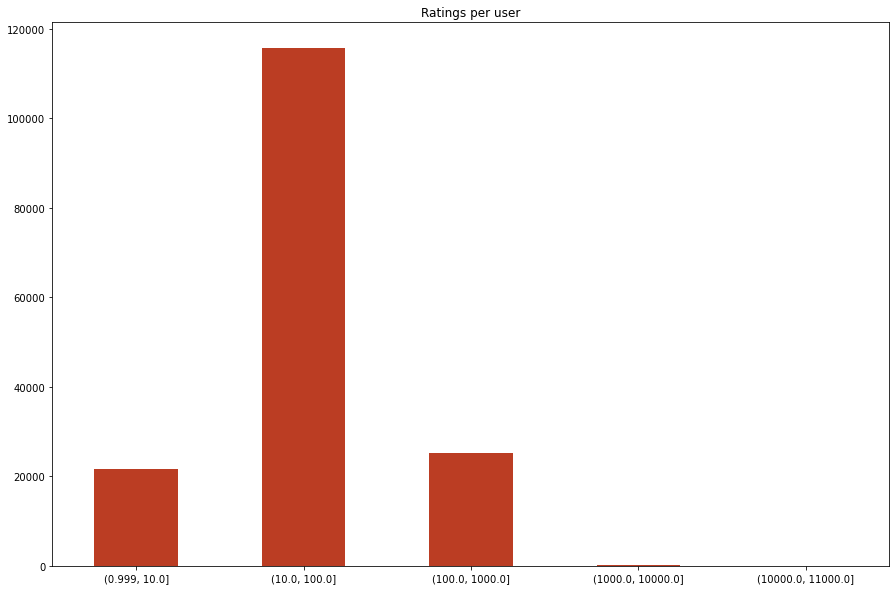

In [36]:
#create a list of the ratings in order to create a bar graph from the list 
ratings_list = ratings_per_user['rating'].tolist()
out = pd.cut(ratings_list, bins=[1,10,100,1000,10000,11000], include_lowest = True)
ax = out.value_counts().plot.bar(rot=0, color="#bb3d23", figsize=(15,10))
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Ratings per user')
plt.show()

##### Observation: 
The bar graph above shows the number of times users have made ratings. About 20 000 users have only rated movies less than 
10 times while more than 100 000 have rated more than 10 times. There are super rators, such as userID 72315 that have made more than 10 000 ratings.
Insight drawn from this graph is that a lot of people do rate movies therefore a recommender system is worth the investment. 

### Distribution of ratings

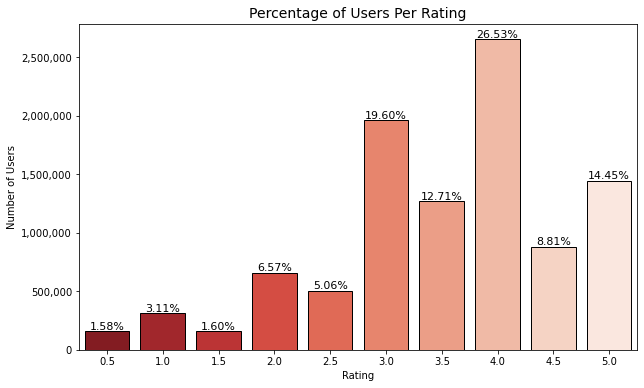

In [37]:
sub_df= train['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=sub_df, x='index', y='rating', palette="Reds_r", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(sub_df['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350,
            '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Percentage of Users Per Rating', fontsize=14)
plt.show()

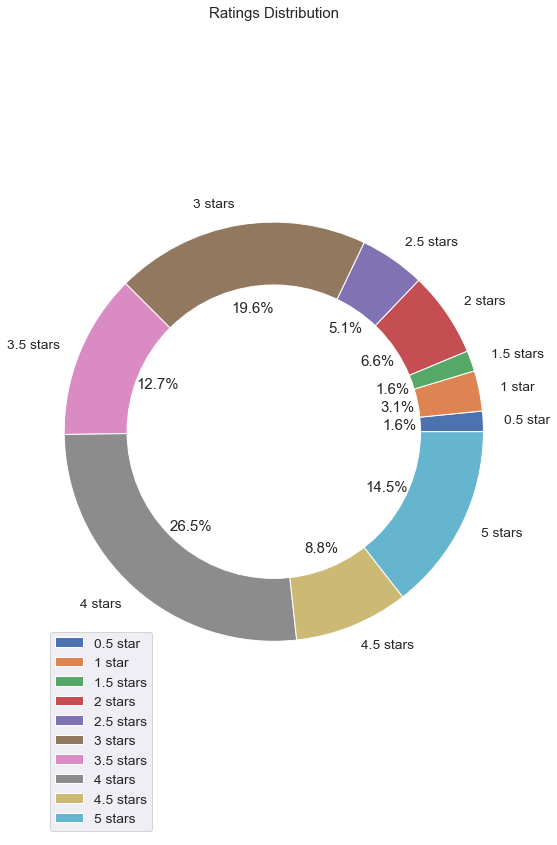

In [38]:
# Create the colour palette
labels = '0.5 star','1 star','1.5 stars','2 stars','2.5 stars','3 stars','3.5 stars','4 stars','4.5 stars','5 stars'
sizes = (train['rating'].value_counts().sort_index()).tolist()
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)


fig1, ax1 = plt.subplots(figsize=(8,12))
pie = ax1.pie(sizes, labels=labels,autopct='%1.1f%%')
ax1.axis('equal') 
#plt.title('Ratings Distribution')

# Turn the pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the donut chart with a legend
plt.title('Ratings Distribution')
#ax.set_title('Rating distribution', fontsize=15)
plt.legend(pie[0], labels, loc="lower left")
plt.tight_layout()
plt.show()



##### Observation:
The train distribution shows that there are relatively fewer movies that are lower rated. This can be because most of the users who didn't like the movie, didn't care enough to rate the movie. You should note this, it can be useful later. As you wouldn't want to recommend movies with relatively low number of ratings as users probably didn't like them.

4 Star ratings make up the largest portion of ratings in the MovieLens dataset, accounting for 26.5% of the overall ratings.
5 star ratings make up 14.5% of the overall ratings (3rd largest portion).
0.5 star ratings account for the smallest portion of the ratings at a mere 1.6%.
Ratings between 2 and 0.5 stars account for 12.9%

### Movie runtime statistics

In [39]:
popular_runtime= pd.DataFrame(imdb['runtime'].value_counts()) 
popular_runtime.head()

runtime
90.0       724
95.0       497
100.0      473
93.0       467
96.0       422

In [40]:
imdb_stats = pd.DataFrame(imdb['runtime'].describe())
imdb_stats

runtime
count  15189.000000
mean     100.312331
std       31.061707
min        1.000000
25%       89.000000
50%       98.000000
75%      109.000000
max      877.000000

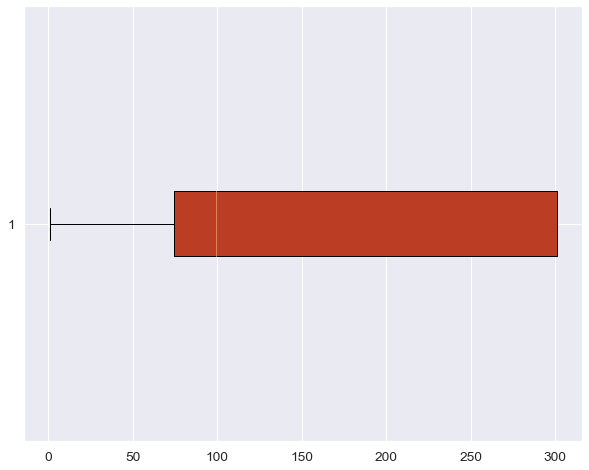

In [41]:
fig = plt.figure(figsize =(10, 8))
 
# Creating plot

box = plt.boxplot(imdb_stats, patch_artist=True, showfliers=False, vert = False)

colors = ['#bb3d23']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# show plot
plt.show()

##### Observation: 
The most common runtime of movies is 90.0 minutes (1HR 30 Minutes). Looking at the summary statistics, we see that a majority of the movies usually deviate from others by 30 minutes with about 50% of the movies running for 90+ minutes. There is a movie that has a runtime of 877 minutes which is equivalent to 14 hours (outlier). The graph will not show outliers. From the stats, it is clear that that runtime is not very common which means that the movie is an outlier and will not be taken into consideration when recommendations are made.

### Most appearing director

In [42]:
imdb['director'].nunique()

11786

In [43]:
def count_directors(df, count = 10):
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [44]:
def feature_count(df, column):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x = df[f'{column}'], y= df['count'], palette='Reds_r')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

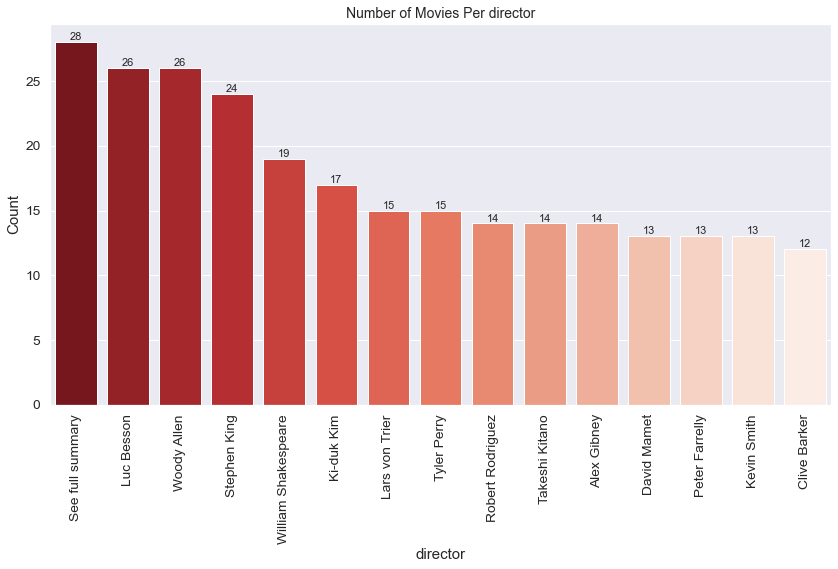

In [45]:
directors = count_directors(imdb)
feature_count(directors.head(15), 'director')

In [46]:
dataset2 = dataset1.head(500)

In [47]:
dataset2.isna().sum()

movieId            0
title_cast         7
director           7
runtime           27
budget           180
plot_keywords     10
title              0
genres             0
dtype: int64

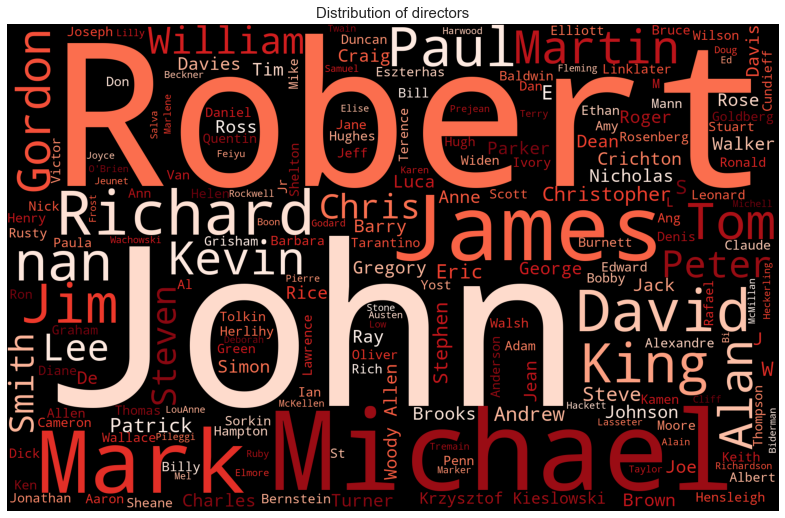

In [48]:
popular_directors = pd.DataFrame(dataset2['director'].value_counts())
popular_directors = popular_directors.head(10)

# Wordcloud of TAGS
directors = dataset2['director'] = dataset2['director'].astype('str')
directors_wordcloud = ' '.join(directors)
direct_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'Black',
                            height = 1200,
                            width = 1900,
                           colormap='Reds').generate(directors_wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(direct_wordcloud)
plt.axis('off')
plt.title('Distribution of directors')
plt.tight_layout(pad=0)
plt.show()

##### Observation:
From above we can see that some directors have directed movies a lot more than others. We have Luc Besson with the most directs at 26 movies and some directors at only 12 movies. The number of times directors have worked on a movie helps better understand their directing style and how they are likely to be rated. With this information, we should be able to make better recommendations based on the popularity of the director and their track record.

### Total movies released per year

In [49]:
movies['release_year']=movies['title'].str[-5:-1] #extracting released year
movies['genres']=movies['genres'].str.split('|') #spliting the genres into a list
movies=pd.concat([movies,train['rating']],axis=1).dropna() #concatinate ratings with movies dataframe
movies.head()

movieId                               title  \
0      1.0                    Toy Story (1995)   
1      2.0                      Jumanji (1995)   
2      3.0             Grumpier Old Men (1995)   
3      4.0            Waiting to Exhale (1995)   
4      5.0  Father of the Bride Part II (1995)   

                                              genres release_year  rating  
0  [Adventure, Animation, Children, Comedy, Fantasy]         1995     4.0  
1                     [Adventure, Children, Fantasy]         1995     4.5  
2                                  [Comedy, Romance]         1995     5.0  
3                           [Comedy, Drama, Romance]         1995     2.0  
4                                           [Comedy]         1995     3.0

In [50]:
imdb['title_cast']=imdb['title_cast'].str.split('|') #spliting the title cast into a list
imdb['plot_keywords']=imdb['plot_keywords'].str.split('|') #spliting the Key words into a list
imdb.head()

movieId                                         title_cast  \
0        1  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1        2  [Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2        3  [Walter Matthau, Jack Lemmon, Sophia Loren, An...   
3        4  [Whitney Houston, Angela Bassett, Loretta Devi...   
4        5  [Steve Martin, Diane Keaton, Martin Short, Kim...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0              [toy, rivalry, cowboy, cgi animation]  
1              [board game, adventurer, fight, game]  
2                    [boat, lake, neighbor, rivalry]  
3  [black american, husband wife relationship, be...  
4               [fatherhood, doberman, dog, mansion]

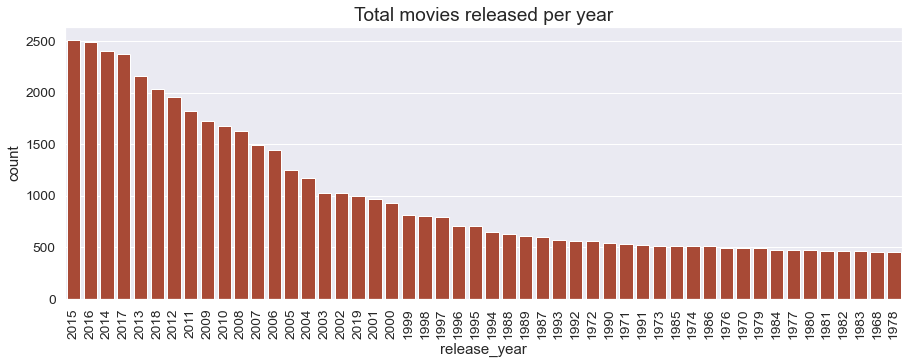

In [51]:
#Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(15, 5))
axes=sns.countplot(x=movies['release_year'], order = movies['release_year'].value_counts()[0:50].index,color='#bb3d23')
axes.set_title('Total movies released per year',fontsize=19)
plt.xticks(rotation=90)
plt.show()

##### Observation:
Above, we observe that the years 2015 and 2016 are the years where the highest number of movies were released.What the diagram above communicates to us is that as the years progress, the amount of movies being released have significantly increased.
This can be largely attributed to the fact that technology has changed a lot of industries and entry into these industry allows for fair competition and variety. 

### Top 20 popular actors

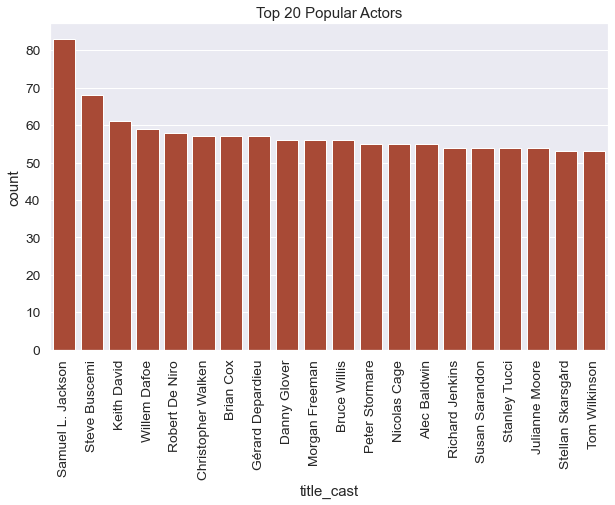

In [52]:
#Plotting popular cast using a count-plot
plt.figure(figsize = (10,6))
title_cast=imdb['title_cast'].explode()
ax=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],color='#bb3d23')
ax.set_title('Top 20 Popular Actors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

##### Observation:
Actors and actresses are artists that have a following and a fanbase. Some actors are contracted more than others. The graph above shows that Samuel L Jackson has been in more than 80 movies. Other famous actors as well have been featured a large number of times. People are likely to watch a movie that has their favourite actor in the movie and these artists wouldn't have been featured so many times if they weren't good. 

### Popular words used in movie titles

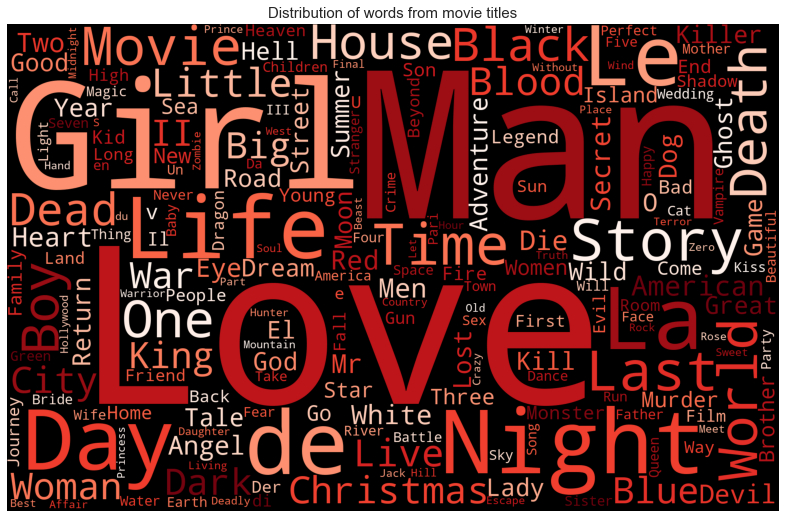

In [53]:
# Wordcloud of movie titles
movies_word = movies['title'] = movies['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'Black',
                            height = 1200,
                            width = 1900,
                           colormap='Reds').generate(movies_wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Distribution of words from movie titles')
plt.tight_layout(pad=0)
plt.show()

##### Observation:
The visual above shows which words are commonly used when movies are titled. The bigger the word, the more it is being used. As can be seen, the word "love", "Man", and "Girl" appears the most.

### Repeating movie names


In [54]:
#check number of repeating titles. 
repeating_movies = pd.DataFrame(movies['title'].value_counts())
repeating_movies['title'].value_counts()

1    62227
2       98
Name: title, dtype: int64

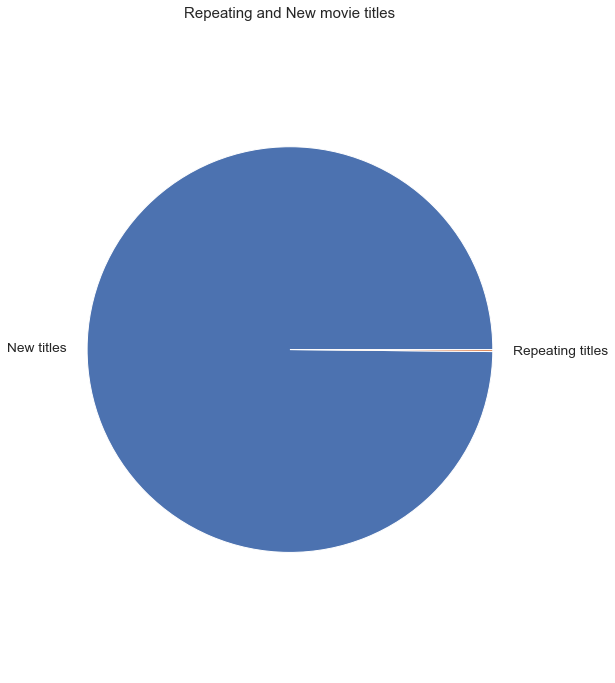

In [55]:
#create parameters for the graph
repeat_df = pd.DataFrame(repeating_movies['title'].value_counts())
repeat_df

label = 'New titles','Repeating titles'
size = repeating_movies['title'].value_counts()

fig1, ax1 = plt.subplots(figsize=(8,12))
ax1.pie(size, labels=label)
ax1.axis('equal') 
plt.title('Repeating and New movie titles')
plt.show()

##### Observation:
From the graph it looks insignificant but most movies titles have only been used once but about 98 movie titles have been used twice. This may cause some confusion for the customers therefore producers are encouraged to avoid using cliche or already used titles that way the movies are not skipped when they come up recommendations (user might assume they have already seen it)

### Top 10 Popular tags

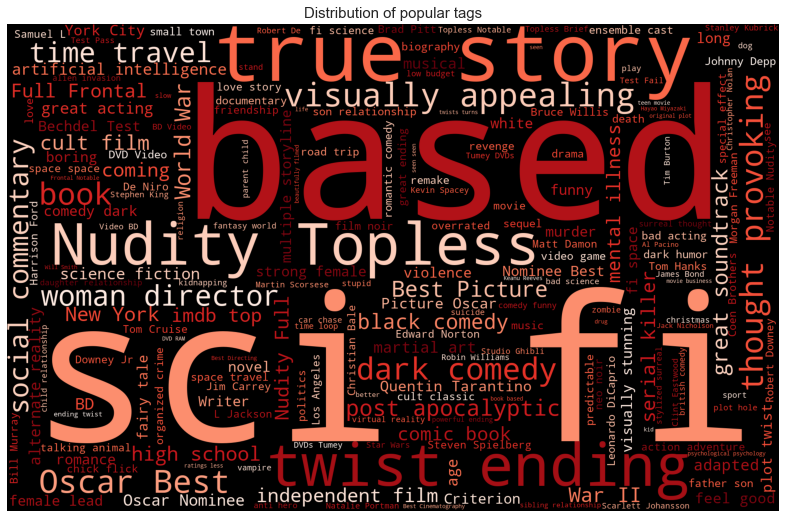

In [56]:
popular_tags = pd.DataFrame(tags['tag'].value_counts())
popular_tags = popular_tags.head(10)

# Wordcloud of TAGS
movies_title = tags['tag'] = tags['tag'].astype('str')
movies_wordcloud = ' '.join(movies_title)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'Black',
                            height = 1200,
                            width = 1900,
                           colormap='Reds').generate(movies_wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Distribution of popular tags')
plt.tight_layout(pad=0)
plt.show()

##### Observation:
To summarise the whole movie in one word users use tags. The visual above shows which words are commonly used to summarise movies and sci-fi is number one, this is because it is the best way to describe a science fiction movie. These tags, many as they are, help users connect with the movie and find similar movies quicker when sentiment is shared. 

# 6. MODELLING
---


# Building the reccomender system
Recommender systems function with two kinds of information:

- Characteristic information: This is information about items (keywords, categories, etc.) and users (preferences, profiles, etc.).

- User-item interactions: This is information such as ratings, number of purchases, likes, etc.

Based on this, we can distinguish between three algorithms used in recommender systems:

- Content-based systems: which use characteristic information.

- Collaborative filtering systems: which are based on user-item interactions.

- Hybrid systems: which combine both types of information with the aim of avoiding problems that are generated when working with just one kind.

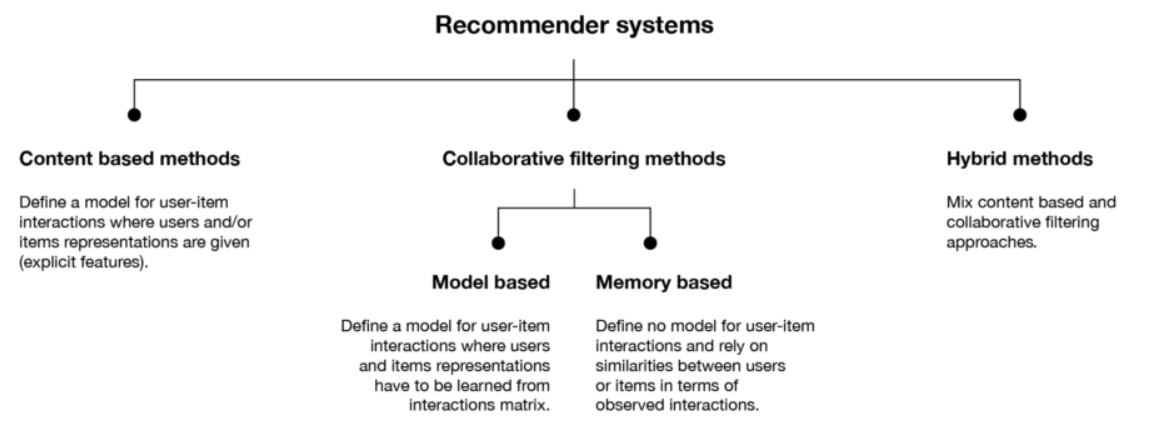

# CONTENT BASED FILTERING
Idea: If you like an item then you will also like a “similar” item

Content based recommender systems are based on the similarity of the items being recommended. It generally works well when its easy to determine the context/properties of each item. For instance when we are recommending the same kind of item like a movie recommendation or song recommendation.

In this recommender system the content of the movie (genre, keywords, cast, directors, tags, etc) will be used to find its similarity with other movies. The movies that are most likely to be similar are then recommended.

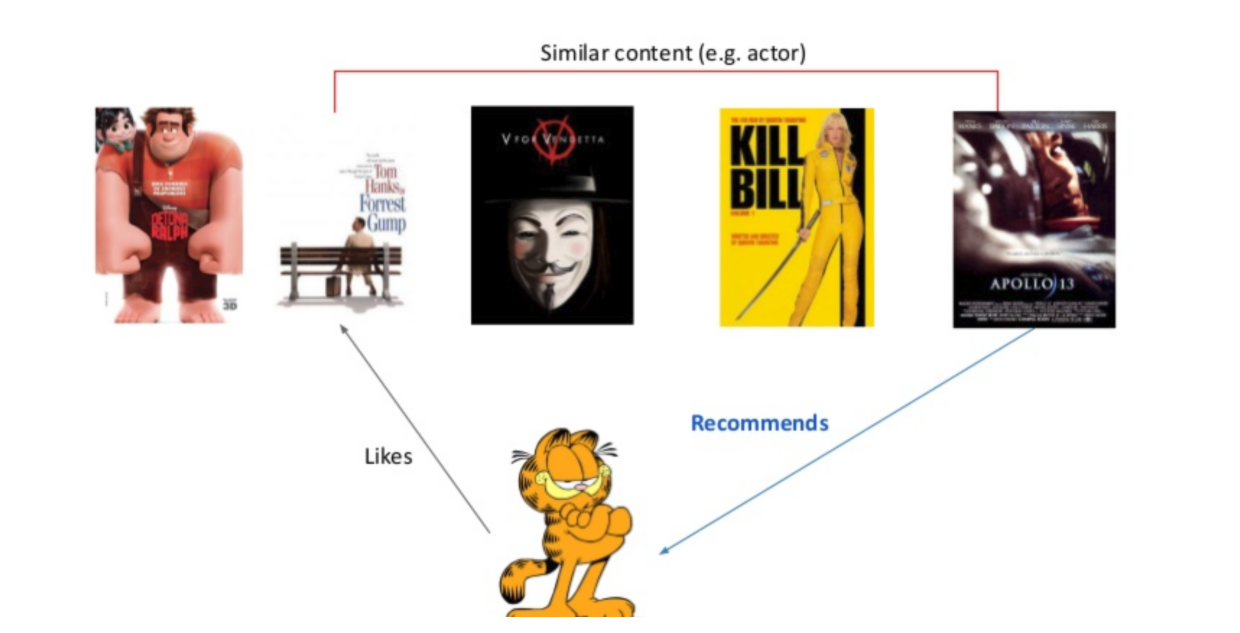




In [64]:
# Convert data types to strings for string handling
dataset1['title_cast'] = dataset1.title_cast.astype(str)
dataset1['plot_keywords'] = dataset1.plot_keywords.astype(str)
dataset1['genres'] = dataset1.genres.astype(str)
dataset1['director'] = dataset1.director.astype(str)

In [65]:
# Creating an empty column and list to store the corpus for each movie
dataset1['corpus'] = ''
corpus = []

# List of the columns we want to use to create our corpus 
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(dataset1['movieId'])):
    words = ''
    for col in columns:
        words = words + dataset1.iloc[i][col] + " "        
    corpus.append(words)
    # Add the corpus information for each movie to the dataframe 
dataset1['corpus'] = corpus
dataset1.set_index('movieId', inplace=True)

# Drop the columns we don't need anymore to preserve memory
dataset1.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

dataset1.head()

runtime       budget                               title  \
movieId                                                             
1           81.0  $30,000,000                    Toy Story (1995)   
2          104.0  $65,000,000                      Jumanji (1995)   
3          101.0  $25,000,000             Grumpier Old Men (1995)   
4          124.0  $16,000,000            Waiting to Exhale (1995)   
5          106.0  $30,000,000  Father of the Bride Part II (1995)   

                                                    corpus  
movieId                                                     
1        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...  
2        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...  
3        Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...  
4        Whitney Houston|Angela Bassett|Loretta Devine|...  
5        Steve Martin|Diane Keaton|Martin Short|Kimberl...

In [66]:
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset1['corpus'])


# Cosine Similarity

Similarity is calculated as the cosine of the angle between the 2 vectors of the item vectors of A and B. The closer the vectors, the smaller the angle and larger the cosine similarity.

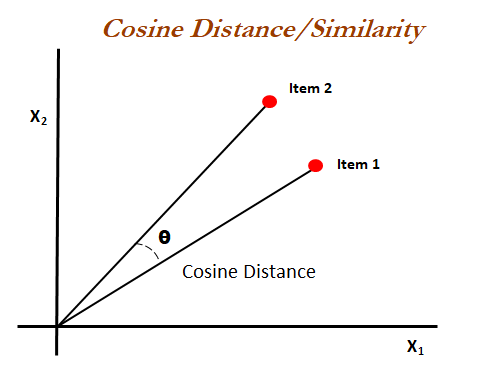

In [68]:
cos_sim = cosine_similarity(count_matrix, count_matrix)
print(cos_sim.shape)
cos_sim

(24866, 24866)


array([[1.        , 0.06063391, 0.06482037, ..., 0.0498548 , 0.020646  ,
        0.08968971],
       [0.06063391, 1.        , 0.02227177, ..., 0.03425944, 0.        ,
        0.04622502],
       [0.06482037, 0.02227177, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0498548 , 0.03425944, 0.        , ..., 1.        , 0.        ,
        0.01900372],
       [0.020646  , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08968971, 0.04622502, 0.        , ..., 0.01900372, 0.        ,
        1.        ]])

In [69]:
def get_topN_recommendations(title, n=10):
    """
    This function gets the top n recomended movies based on the 
    title of the movie input by the user 
    
    Input: title
           Datatype: str
           
           n (default = 10)
           Datatype: int
    """ 
    # Create a a copy of the input dataframe where the index has been reset
    df1 = dataset1.reset_index()
    
    # Extract the movie titles
    titles = df1['title']
    indices = pd.Series(df1.index, index=dataset1['title'])
    idx = indices[title]
    
    # Get the similarity scores of the top n movies most similar to the user input
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n]
    
    # Exctract the titles of the top n most similar movies  
    movie_indices = [i[0] for i in sim_scores]
    
    return titles.iloc[movie_indices]

get_topN_recommendations('Ice Age (2002)').head(10)

10648           Ice Age 2: The Meltdown (2006)
13437    Ice Age: Dawn of the Dinosaurs (2009)
18129      Ice Age 4: Continental Drift (2012)
9591             Pooh's Heffalump Movie (2005)
16662                   Winnie the Pooh (2011)
24597    Tom and Jerry: The Lost Dragon (2014)
18330                    Runaway Brain (1995) 
12008    Walk Hard: The Dewey Cox Story (2007)
24823                   Superstar Goofy (1991)
Name: title, dtype: object

# COLLABORATIVE FILTERING

# Feature Engineering

In [24]:
# Load reader and data in surprise friendly format
reader = Reader(rating_scale=(0.5, 5))
train2 = Dataset.load_from_df(train1[['userId', 'movieId', 'rating']], reader)

Now that we have loaded and prepared our data to be ready for modelling, we can begin training the models. 
The models we are going to train are:
- Baseline Only model
- sVD model
- NMF model


# Baseline only model


BaselineOnly algorithm predicts the baseline estimate for given user and item.A baseline is a method that uses simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline’s performance (e.g., accuracy)– this metric will then become what you compare any other machine learning algorithm against.

In [25]:
# Baseline Only model

algo_b = BaselineOnly()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_b.fit(trainset)
predictions_b = algo_b.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions_b, verbose=True)

Estimating biases using als...
RMSE: 0.8657


0.8656763553648548

# SVD model

SVD algorithm is equivalent to Probabilistic Matrix Factorization.
This is a technique that comes from the field of linear algebra and can be used as a data preparation technique to create a projection of a sparse dataset prior to fitting a model.

In [26]:
# SVD model

algo_svd = SVD()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions_svd, verbose=True)

RMSE: 0.8257


0.825655614180046

# NFM Model
Non-negative Matrix Factorization is a Linear-algeabreic model, that factors high-dimensional vectors into a low-dimensionality representation. Similar to Principal component analysis (PCA), NMF takes advantage of the fact that the vectors are non-negative.

In [27]:
algo_nmf = NMF()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions_nmf, verbose=True)


RMSE: 0.8810


0.8810423998414555

# Hyperparameter tunning of best model

In [30]:
rating_scale = Reader(rating_scale=(0.5, 5))
train = Dataset.load_from_df(train.drop('timestamp', axis=1), rating_scale)

# Training and validation set split for hypertuning
train_set, val_set = train_test_split(train,
                                      test_size=0.008,
                                      random_state=42)

# Modelling of the SVD hypertuning
svd_algo_hyper = SVD(n_factors=160, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=20,
                     init_std_dev=0.01)
svd_algo_hyper.fit(train_set)

# Predicting on the validation set
svd_hyper_predictions = svd_algo_hyper.test(val_set)

# Convert the predictions to dataframe
#test = pd.DataFrame(predictions)
accuracy.rmse(svd_hyper_predictions)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}

RMSE: 0.7889
RMSE: 0.7889


Hyperparameter tuning makes the process of determining the best hyperparameter settings easier and less tedious. The model that has been tuned is the SVD model and the performance increased. 

In [72]:
mydict = {f'SVD Hyper': 0.7889,
          f'SVD': 0.8263,
          f'Baseline Only': 0.8652,
          f'NMF': 0.8810
         }

i = pd.DataFrame(mydict.items(), columns=['Model', 'RSME'])
i

Model    RSME
0      SVD Hyper  0.7889
1            SVD  0.8263
2  Baseline Only  0.8652
3            NMF  0.8810

#### Making predictions

In [31]:
pred_svd_hyper = [svd_algo_hyper.predict(row.userId,
                                         row.movieId) for idx,row in test.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)

#### Displaying predictions

In [32]:
#renaming the fields of the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper = test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

userId  movieId    rating
0       1     2011  3.002552
1       1     4144  4.170337
2       1     5767  3.799900
3       1     6711  4.183175
4       1     7318  2.917190

In [33]:
# Concatenating each userId and movieId to a single Id column for submission
test_pred_svd_hyper['Id'] =  test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [34]:
svd_hyper_predictions = test_pred_svd_hyper[['Id','rating']]
svd_hyper_predictions.head()

Id    rating
0  1_2011  3.002552
1  1_4144  4.170337
2  1_5767  3.799900
3  1_6711  4.183175
4  1_7318  2.917190

# Saving model

In [35]:
svd_hyper_predictions[['Id','rating']].to_csv('MM2_submission.csv', index=False)

In [36]:
svd_hyper_predictions

Id    rating
0             1_2011  3.002552
1             1_4144  4.170337
2             1_5767  3.799900
3             1_6711  4.183175
4             1_7318  2.917190
...              ...       ...
5000014  162541_4079  3.443772
5000015  162541_4467  4.033732
5000016  162541_4980  2.651881
5000017  162541_5689  2.868349
5000018  162541_7153  5.000000

[5000019 rows x 2 columns]

# Saving pickle models

In [38]:
model_save_path = "svd.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(svd_algo_hyper, file)

In [39]:
model_save_path = "nmf.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(algo_nmf, file)

In [40]:
model_save_path = "b.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(algo_b, file)

# CONCLUSION 
---
The 1M movieLens dataset was used to build our recommender system. 
This dataset contains movie ratings and movie specific data dating back 50 years. After doing an exploratory data analysis we noted that there was a huge spike in movie production between 1990 and 2000 which has slowed down significantly in the last few years. The most popular movie of the past 50 years is the Shawshank redemption starring Morgan Freeman which receives an average rating of 4.4 stars after being rated by more than 30000 users. There are 19 unique movie genres in the dataset with Drama, comedy and thriller being the 3 most popular genres.

We explored 4 different methods for building our recommender system. The content based method proved to be too memory intensive and was dismissed as a possible solution.

Collaborative based methods were investigated next since they are based solely on the past interactions recorded between users and items in order to produce new recommendations. These methods do not require item meta-data like their content-based counterparts.

The 2 memory based methods explored were user based and item based. Both these methods performed adequately but have issues with sparsity and scalability.

The final method we tried was singular value decomposition(SVD), a model based collaborative filtering method which addresses the sparsity issue we had with the user-user and item-item based methods as well as having the added benefit of being less memory intensive compared to content based filtering methods.

The SVD model was able to predict new ratings with a RMSE of 0.78